## Load the Data
The next task is to load the data in Python. For this section, we’ll want to write some code to load the red wine CSV file as a pandas dataframe.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [64]:
file_path_1 = '/home/joo/jnotebook/winequality-red.csv'
file_path_2 = '/home/joo/jnotebook/winequality-white.csv'

In [65]:
data1 = pd.read_csv(file_path_1, delimiter=";")
data2 = pd.read_csv(file_path_2, delimiter=';')

In [66]:
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [67]:
data2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [68]:
print(len(data1))
print(len(data2))      
print(data1['quality'].value_counts())
print(data2['quality'].value_counts())
col_1 = data1['quality'].unique()
print(col_1)
col_2 = data1['quality'].unique()

1599
4898
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64
quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64
[5 6 7 4 8 3]


## Split the data
Now that we’ve loaded the data as a pandas dataframe, we’ll partition the data off into a train and test subset.

Randomly sample 70% of the data for training, and the other 30% will be used for testing.

In [69]:
def stratified_split(data, col,col_unique ,train_ratio, valid_ratio, test_ratio) : 
    
    train_data = []
    val_data = []
    test_data = []
    for i in col_unique :
        class_data = data[data[col]==i].sample(frac=1, random_state=42).reset_index(drop=True)

        data_len = len(class_data)
        train_end = int(data_len*train_ratio)
        val_end = train_end+int(data_len*valid_ratio)
        
        train_data.append(class_data.iloc[:train_end])
        val_data.append(class_data.iloc[train_end:val_end])
        test_data.append(class_data.iloc[val_end:])
    train = pd.concat(train_data).reset_index(drop=True)
    val = pd.concat(val_data).reset_index(drop=True)
    test = pd.concat(test_data).reset_index(drop=True)
    return train, val, test
    

In [70]:
train_1, val_1, test_1 = stratified_split(data1, 'quality',col_1, 0.7,0.2,0.1)
print(f"Train data size: {len(train_1)}")
print(f"Validation data size: {len(val_1)}")
print(f"Test data size: {len(test_1)}")

Train data size: 1117
Validation data size: 317
Test data size: 165


In [71]:
print("\nTrain :\n", train_1['quality'].value_counts(normalize=True))
print("\nValidation :\n", val_1['quality'].value_counts(normalize=True))
print("\nTest:\n", test_1['quality'].value_counts(normalize=True))


Train :
 quality
5    0.426141
6    0.399284
7    0.124440
4    0.033124
8    0.010743
3    0.006267
Name: proportion, dtype: float64

Validation :
 quality
5    0.429022
6    0.400631
7    0.123028
4    0.031546
8    0.009464
3    0.006309
Name: proportion, dtype: float64

Test:
 quality
5    0.418182
6    0.393939
7    0.127273
4    0.036364
8    0.018182
3    0.006061
Name: proportion, dtype: float64


In [72]:
train_2, val_2, test_2 = stratified_split(data2, 'quality',col_2, 0.7,0.2,0.1)
print(f"Train data size: {len(train_2)}")
print(f"Validation data size: {len(val_2)}")
print(f"Test data size: {len(test_2)}")

Train data size: 3423
Validation data size: 977
Test data size: 493


In [73]:
print("\nTrain :\n", train_2['quality'].value_counts(normalize=True))
print("\nValidation :\n", val_2['quality'].value_counts(normalize=True))
print("\nTest:\n", test_2['quality'].value_counts(normalize=True))


Train :
 quality
6    0.449313
5    0.297692
7    0.179959
8    0.035641
4    0.033304
3    0.004090
Name: proportion, dtype: float64

Validation :
 quality
6    0.449335
5    0.297851
7    0.180143
8    0.035824
4    0.032753
3    0.004094
Name: proportion, dtype: float64

Test:
 quality
6    0.448276
5    0.298174
7    0.178499
8    0.036511
4    0.034483
3    0.004057
Name: proportion, dtype: float64


In [74]:
train_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.470,0.46,2.2,0.114,7.0,20.0,0.99647,3.32,0.63,10.5,5
1,9.5,0.885,0.27,2.3,0.084,31.0,145.0,0.99780,3.24,0.53,9.4,5
2,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.99650,3.45,0.56,10.7,5
3,10.8,0.260,0.45,3.3,0.060,20.0,49.0,0.99720,3.13,0.54,9.6,5
4,7.1,0.430,0.42,5.5,0.071,28.0,128.0,0.99730,3.42,0.71,10.5,5


## Normalise the data
To ensure all of the columns are within the same range, we’ll normalise them (except from the score column of course!).

We can normalise a column x by the following equation:
normalise = x - min_x / max_x - min_x
 
Therefore, we’ll need to calculate the min and max values of each column in the training subset, then apply the normalising function, using these values.

In [75]:
def Normalise (data):
    data_n = data.copy()
    for column in data.columns :
        if column != 'quality':
            data_n[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
    return data_n
            
            
            

In [76]:
train_1n = Normalise(train_1)
val_1n = Normalise(val_1)
test_1n = Normalise(test_1)
train_2n = Normalise(train_2)
val_2n = Normalise(val_2)
test_2n = Normalise(test_2)

In [77]:
train_1n

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.239726,0.582278,0.089655,0.170284,0.089552,0.051471,0.469897,0.394737,0.161491,0.323077,5
1,0.433628,0.523973,0.341772,0.096552,0.120200,0.447761,0.511029,0.567548,0.324561,0.099379,0.153846,5
2,0.194690,0.448630,0.000000,0.144828,0.150250,0.104478,0.062500,0.472100,0.508772,0.118012,0.353846,5
3,0.548673,0.095890,0.569620,0.165517,0.080134,0.283582,0.158088,0.523495,0.228070,0.105590,0.184615,5
4,0.221239,0.212329,0.531646,0.317241,0.098497,0.402985,0.448529,0.530837,0.482456,0.211180,0.323077,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1112,0.265487,1.000000,0.000000,0.082759,0.208681,0.059701,0.011029,0.344347,0.552632,0.018634,0.384615,3
1113,0.619469,0.315068,0.835443,0.089655,0.103506,0.134328,0.150735,0.787812,0.333333,0.124224,0.092308,3
1114,0.238938,0.589041,0.063291,0.082759,0.081803,0.283582,0.158088,0.512482,0.385965,0.111801,0.200000,3
1115,0.247788,0.729452,0.000000,0.231034,0.141903,0.059701,0.029412,0.479442,0.666667,0.105590,0.353846,3


## Looking at the correlations
Using the training subset, we’ll want to find out which columns to use in our classifier.

We’ll visually inspect the correlations between the input columns and the target score column.

Create a series of 2D scatter plots with an input column across the x-axis, and the target score column across the y-axis.

Which of these columns show a strong relationship between the input and target columns?

### Answer 
I think citric acid has a strong relationship with the input and target columns. In the scatter plot, the points for citric acid align well compared to other scatter plots. Especially in the quality column 5, 6, and 7, the points are densely packed, meaning they are closely connected with the label.

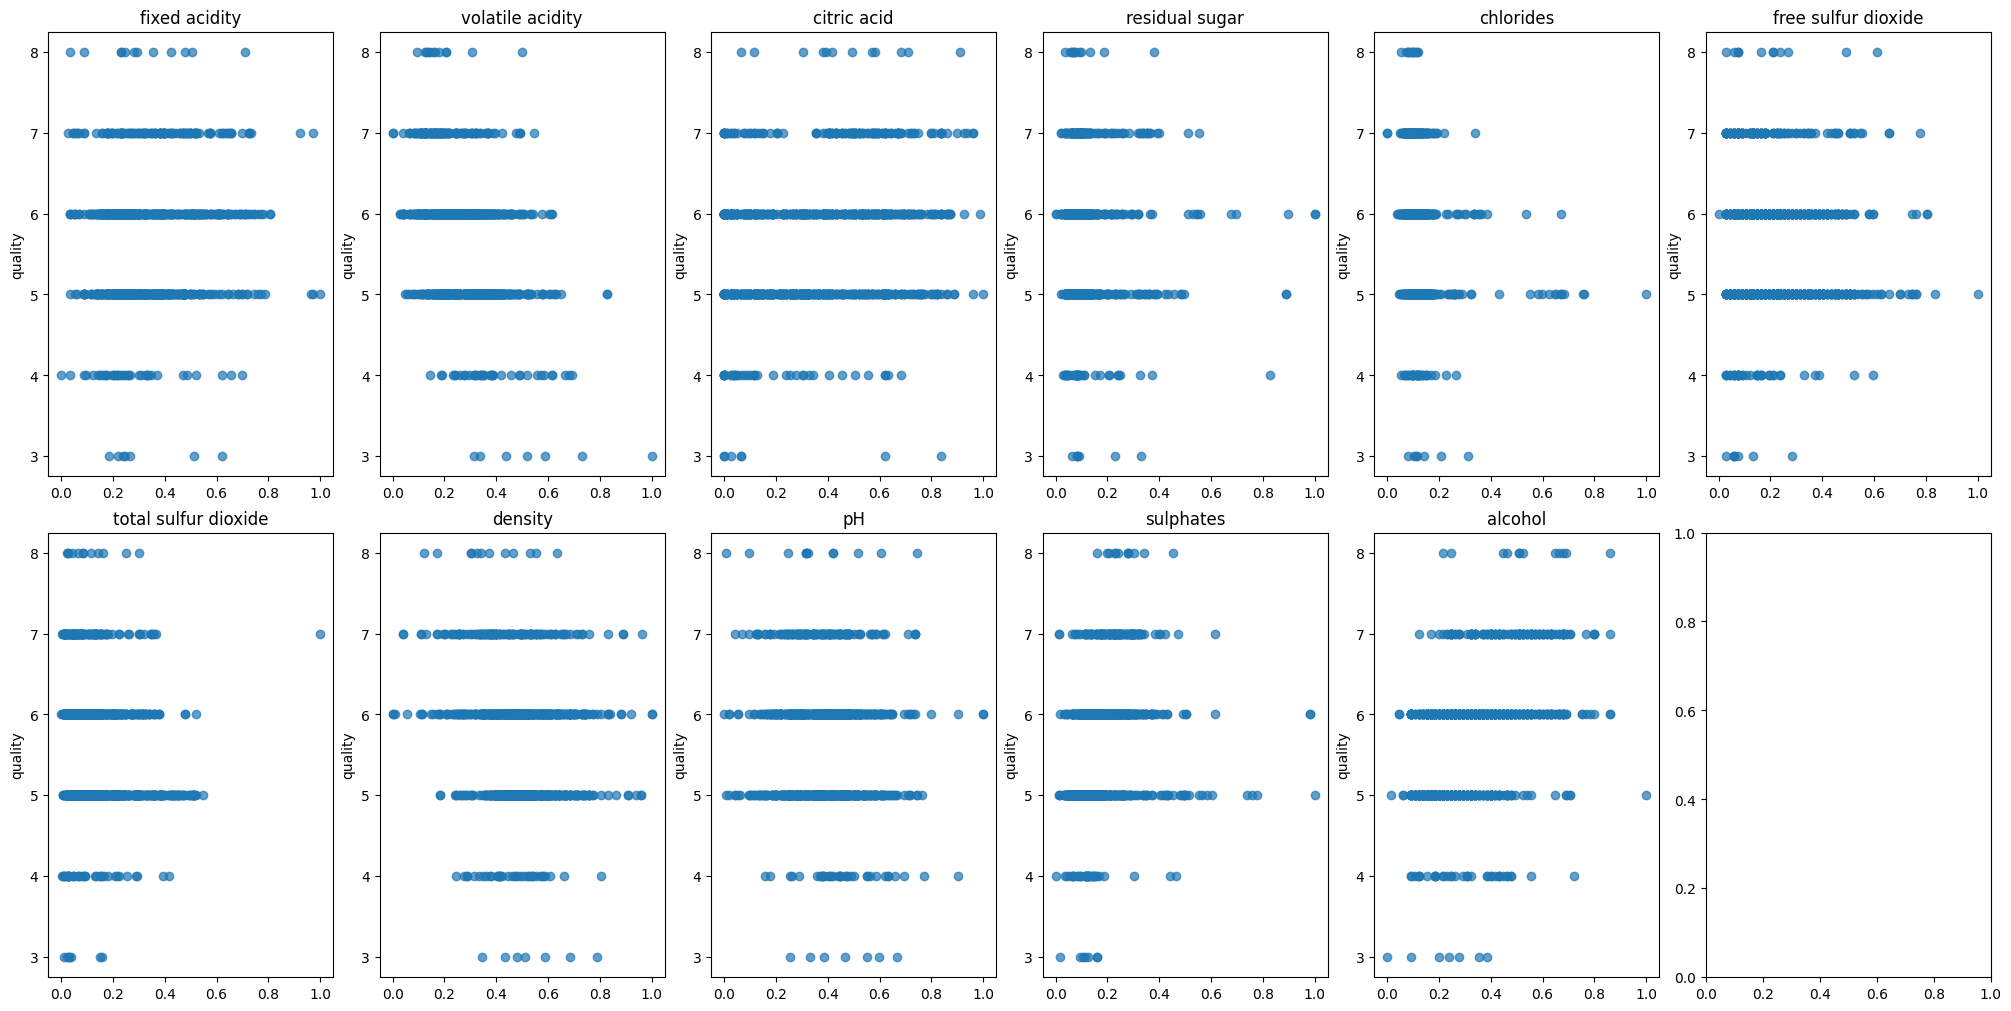

In [78]:
def plot_scatter(data):
    columns = data.columns[:-1]
    target = data.columns[-1]
    fig, axes = plt.subplots(2,6,figsize=(20,10),constrained_layout=True)
    for i, column in enumerate(columns) :
        row, col = divmod(i, 6) 
        axes[row, col].scatter(data[column], data[target], alpha=0.7)
        axes[row, col].set_title(column)
        axes[row, col].set_ylabel(target)
    plt.show()
scatters = plot_scatter(train_1n)

## Create a K-Nearest Neighbour

Create a KNN classifier and k = 3, using some of the input colums (the best ones as decided by the correlation plots).



1. calculate the Euclidean distance between two vectors

In [80]:

y_train = train_1n['quality'].values 
X_train = train_1n[['citric acid']].values  
X_test = test_1n[['citric acid']].values
y_test = test_1n['quality'].values  


In [81]:
def euclidean_distance(row1, row2):
   return np.sqrt(np.sum((row1-row2)**2))

def knn_predict(train_x,train_y, test_x, k=3):
    y_pred = []
    for test_point in test_x:
        distances = [euclidean_distance(test_point, x) for x in train_x]
        neighbors = np.argsort(distances)[:k]
        neighbor_labels = np.array(train_y[neighbors], dtype=int) 
        most_common = np.bincount(neighbor_labels).argmax()
        y_pred.append(most_common)
    return np.array(y_pred)
    

In [82]:

k = 3  
y_pred = knn_predict(X_train, y_train, X_test, k)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 33.94%


In [83]:
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)


# Create Classification performance metrics
Create a series of classification metrics for the new KNN classifier:

1. f1 score (averaged over all classes)
2. Plot a confusion matrix.

In [84]:


def precision_recall_f1(y_true, y_pred):
    unique_classes = list(set(y_true)) 
    precision_list = []
    recall_list = []
    f1_list = []
    
    for c in unique_classes:
        TP = sum([1 for i in range(len(y_true)) if y_pred[i] == c and y_true[i] == c])
        FP = sum([1 for i in range(len(y_true)) if y_pred[i] == c and y_true[i] != c])
        FN = sum([1 for i in range(len(y_true)) if y_pred[i] != c and y_true[i] == c])
        
        if TP + FP == 0:
            precision = 0
        else:
            precision = TP / (TP + FP)
            
        if TP + FN == 0:
            recall = 0
        else:
            recall = TP / (TP + FN)
        
        if precision + recall == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)
        
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
    
    avg_precision = sum(precision_list) / len(precision_list)
    avg_recall = sum(recall_list) / len(recall_list)
    avg_f1 = sum(f1_list) / len(f1_list)
    
    return avg_precision, avg_recall, avg_f1

In [85]:


def confusion_matrix(y_true, y_pred):
    classes = np.unique(y_true)
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    
    for i, actual in enumerate(classes):
        for j, predicted in enumerate(classes):
            matrix[i, j] = np.sum((y_true == actual) & (y_pred == predicted))

    return matrix, classes

def plot_confusion_matrix(matrix, classes):
    fig, ax = plt.subplots(figsize=(6, 6))
    cax = ax.matshow(matrix, cmap=plt.cm.Blues)
    plt.colorbar(cax)

    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(matrix[i, j]), va='center', ha='center', color='red')

    plt.show()


Accuracy: 33.94%
Precision: 0.16
Recall: 0.16
F1-score: 0.15
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 1  1  4  0  0  0]
 [ 6 11 39 13  0  0]
 [ 4 10 32 16  3  0]
 [ 2  3 11  5  0  0]
 [ 1  0  1  1  0  0]]


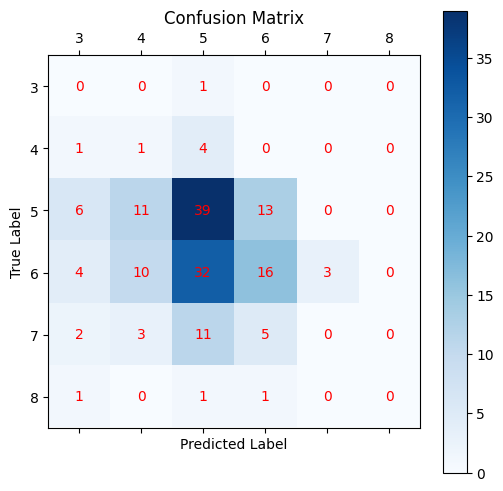

In [86]:

y_pred = knn_predict(X_train, y_train, X_test, k=3)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")

precision, recall, f1 = precision_recall_f1(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


conf_matrix, class_labels = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


plot_confusion_matrix(conf_matrix, class_labels)


# Plot performance metrics for different 
Using the KNN classifier, modify the k value from 1 to N and plot the f1 score for each value of k. What is the optimal value for k?

k_values = range(1, 21)  
f1_scores = []

for k in k_values:
    y_pred = knn_predict(X_train, y_train, X_test, k)  
    _, _, f1 = precision_recall_f1(y_test, y_pred)  
    f1_scores.append(f1)  # F1-score 

plt.figure(figsize=(10, 5))
plt.plot(k_values, f1_scores, marker='o', linestyle='dashed', color='b', label="F1-score")
plt.xlabel("value of (k)")
plt.ylabel("F1-score")
plt.title("KNN evaluation: F1-score vs k")
plt.legend()
plt.grid(True)
plt.show()


best_k = k_values[np.argmax(f1_scores)]
print(f"optimal value of k: {best_k} (best F1-score: {max(f1_scores):.2f})")
